FOLD 2 DID NOT CONVERGE

In [2]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
import pickle

In [3]:
# FILE LOCATION OF DATA
project_folder = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Football2024'
data_folder_loc = r'C:\Users\giova\Documents\School\Classes\Spring 2025\Capstone Project\Data'

folds_file = r'\folds_data.csv'

In [4]:
# READ DATA
folds_df = pd.read_csv(project_folder + folds_file)

In [5]:
folds_df['FAN_PHONE_MARKETABLE1'] = (folds_df['FAN_PHONE_MARKETABLE'] == 1).astype(int)
folds_df['HAS_OPENED_EMAIL1'] = (folds_df['HAS_OPENED_EMAIL'] == 1).astype(int)
folds_df['HAS_DONATED1'] = (folds_df['HAS_DONATED'] == 1).astype(int)
folds_df['HAS_MADE_PURCHASE1'] = (folds_df['HAS_MADE_PURCHASE'] == 1).astype(int)
folds_df['DONATION_CURRENT_DONOR1'] = (folds_df['DONATION_CURRENT_DONOR'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)
folds_df['TICKETING_CURRENTYEARSTM1'] = (folds_df['TICKETING_CURRENTYEARSTM'] == 1).astype(int)
folds_df['TICKETING_PREVSEASONSTM1'] = (folds_df['TICKETING_PREVSEASONSTM'] == 1).astype(int)
folds_df['FAN_POSTAL_MARKETABLE1'] = (folds_df['FAN_POSTAL_MARKETABLE'] == 1).astype(int)
folds_df['ISRESOLD1'] = (folds_df['ISRESOLD'] == 1).astype(int)

In [6]:
folds_df.head()

,GRMCONTACTID,EVENTNAME,SECTIONNAME,ROWNAME,SEAT,REVENUETOTAL,PLANCODE,ISMOBILE,RESOLDTOTALAMOUNT,ISATTENDED,...,fold,FAN_PHONE_MARKETABLE1,HAS_OPENED_EMAIL1,HAS_DONATED1,HAS_MADE_PURCHASE1,DONATION_CURRENT_DONOR1,ISRESOLD1,TICKETING_CURRENTYEARSTM1,TICKETING_PREVSEASONSTM1,FAN_POSTAL_MARKETABLE1
0,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TIGERS,11,16,14,60.0,FB24,1,0.0,1,...,1,1,1,1,1,1,0,1,1,1
1,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,15,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
2,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. TERRIERS,11,16,16,30.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
3,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. MONARCHS,11,16,14,35.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1
4,1&&000269ca-d64c-4cc9-871a-505ebcd59bda,VS. REBELS,11,16,13,70.0,FB24,0,0.0,1,...,1,1,1,1,1,1,0,1,1,1


In [7]:
fold1_train = folds_df[folds_df['fold'] != 1]
fold1_test = folds_df[folds_df['fold'] == 1]

In [8]:
fold2_train = folds_df[folds_df['fold'] != 2]
fold2_test = folds_df[folds_df['fold'] == 2]

In [9]:
fold3_train = folds_df[folds_df['fold'] != 3]
fold3_test = folds_df[folds_df['fold'] == 3]

In [10]:
fold4_train = folds_df[folds_df['fold'] != 4]
fold4_test = folds_df[folds_df['fold'] == 4]

In [11]:
fold5_train = folds_df[folds_df['fold'] != 5]
fold5_test = folds_df[folds_df['fold'] == 5]

In [12]:
import numpy as np

def predict_probability2(row):
    score = 2.526386  # Intercept

    # Individual features
    score += -0.091695 * row.get('DONATION_CURRENT_DONATION_AMOUNT', 0)
    score += 0.356499 * row.get('FAN_PHONE_MARKETABLE1', 0)
    score += -0.632589 * row.get('TICKETING_CURRENTYEARSTM1', 0)
    score += 0.056684 * row.get('TICKETING_PREVSEASONSTM1', 0)
    score += 0.141492 * row.get('DONATION_CURRENT_DONOR1', 0)
    score += 0.043196 * row.get('HAS_OPENED_EMAIL1', 0)
    score += 0.080058 * row.get('HAS_DONATED1', 0)
    score += 0.025796 * row.get('HAS_MADE_PURCHASE1', 0)

    # Seating colors
    seating_coefs = {
        'Blue': 0.182070,
        'Garnet': 0.423545,
        'Gray': 0.032876,
        'Green': -0.004997,
        'Hot Pink': 0.107365,
        'Light Blue': 0.718726,
        'Lime Green': 0.730398,
        'Other': 0.610640,
        'Pink': 0.411540,
        'Purple': 0.772779,
        'Red': 0.113506,
        'Tan': 0.963154,
        'Teal': 0.141622,
        'White': 1.306721,
        'Yellow': 0.053502,
    }
    for color, coef in seating_coefs.items():
        score += coef * row.get(f'SEATING{color}', 0)

    # Lead source (initial)
    score += -0.200339 * row.get('FAN_INITIAL_LEAD_SOURCEGamecocksMigration', 0)
    score += -0.071259 * row.get('FAN_INITIAL_LEAD_SOURCESalesforce', 0)
    score += 0.041435 * row.get('FAN_INITIAL_LEAD_SOURCESFMC', 0)
    score += 0.270632 * row.get('FAN_INITIAL_LEAD_SOURCETicketmaster', 0)

    # Lead source (last)
    score += -0.153321 * row.get('FAN_LAST_LEAD_SOURCEGamecocksMigration', 0)
    score += 0.068691 * row.get('FAN_LAST_LEAD_SOURCESalesforce', 0)
    score += -0.126150 * row.get('FAN_LAST_LEAD_SOURCESFMC', 0)
    score += -0.189697 * row.get('FAN_LAST_LEAD_SOURCETicketmaster', 0)

    # Other categorical / binary variables
    score += 0.083246 * row.get('FAN_POSTAL_MARKETABLE1', 0)
    score += 0.543349 * row.get('ISRESOLD1', 0)

    # Event names
    score += -0.790569 * row.get('EVENTNAMEVS. MONARCHS', 0)
    score += -0.150160 * row.get('EVENTNAMEVS. REBELS', 0)
    score += -0.796737 * row.get('EVENTNAMEVS. TERRIERS', 0)
    score += -0.157768 * row.get('EVENTNAMEVS. TIGERS', 0)
    score += -0.743196 * row.get('EVENTNAMEVS. ZIPS', 0)

    # Plan codes
    score += -0.255161 * row.get('PLANCODEFB24-1', 0)
    score += -1.309031 * row.get('PLANCODEGCFREE25', 0)
    score += -0.266253 * row.get('PLANCODEUnknown/Not Specified', 0)

    # Continuous ticketing and revenue features
    score += -0.687635 * row.get('TICKETING_TICKETS_SCANNED', 0)
    score += 0.250924 * row.get('TICKETING_TICKET_TOTAL_SPEND', 0)
    score += -0.075326 * row.get('TICKETING_STM_TENURE', 0)
    score += 0.221924 * row.get('TICKETING_GAMES_SOLD_SECONDARY', 0)
    score += 0.777230 * row.get('TICKETING_GAMES_SCANNED', 0)
    score += -0.003286 * row.get('TICKETING_GAMES_PURCHASED_SECONDARY', 0)
    score += 1.261871 * row.get('TICKETING_ATTENDANCE_SEASON_PCT', 0)
    score += -0.019137 * row.get('TICKETING_ATTENDANCE_LIFETIME_PCT', 0)
    score += 0.124958 * row.get('REVENUETOTAL', 0)
    score += 0.019297 * row.get('RESOLDTOTALAMOUNT', 0)

    # Merchandise features
    score += -0.014624 * row.get('MERCH_TOTALSPENT_LIFETIME', 0)
    score += 0.013489 * row.get('MERCH_TOTALSPENT_90DAYS', 0)
    score += -0.080654 * row.get('MERCH_TOTALSPENT_365DAYS', 0)
    score += -0.007851 * row.get('MERCH_TOTALSPENT_30DAYS', 0)

    score += 0.009092 * row.get('FAN_UNIQUE_SOURCESYSTEM_COUNT', 0)
    score += -0.128004 * row.get('ENGAGEMENT', 0)
    score += 0.084796 * row.get('EMAIL_EMAIL_OPEN_PCT', 0)
    score += 0.001498 * row.get('EMAIL_EMAIL_OPEN_COUNT', 0)
    score += 0.116496 * row.get('EMAIL_EMAIL_CLICK_PCT', 0)
    score += -0.078407 * row.get('DONATION_TOTAL_DONATION_AMOUNT', 0)
    score += 0.025949 * row.get('DONATION_MAX_DONATION_AMOUNT', 0)
    
    # Final prediction using sigmoid
    prob = 1 / (1 + np.exp(-score))
    return prob

In [13]:
# Updated normalization info with new means and standard deviations
normalize_info = {
    'REVENUETOTAL': (52.38138, 27.8137),
    'RESOLDTOTALAMOUNT': (6.968501, 34.60077),
    'TICKETING_STM_TENURE': (6.589537, 6.684632),
    'TICKETING_GAMES_SCANNED': (75.97391, 268.3653),
    'TICKETING_TICKETS_SCANNED': (769.6345, 3379.443),
    'TICKETING_GAMES_SOLD_SECONDARY': (3.931868, 18.20831),
    'TICKETING_GAMES_PURCHASED_SECONDARY': (0.5593764, 1.630231),
    'TICKETING_TICKET_TOTAL_SPEND': (272993.6, 703151.9),
    'DONATION_MAX_DONATION_AMOUNT': (1645.807, 16638.75),
    'DONATION_TOTAL_DONATION_AMOUNT': (56014.51, 214300.7),
    'DONATION_CURRENT_DONATION_AMOUNT': (65894.77, 212799),
    'EMAIL_EMAIL_OPEN_COUNT': (378.9841, 386.11),
    'MERCH_TOTALSPENT_30DAYS': (0.449319, 8.614134),
    'MERCH_TOTALSPENT_90DAYS': (12.01212, 55.53054),
    'MERCH_TOTALSPENT_365DAYS': (30.14169, 103.514),
    'MERCH_TOTALSPENT_LIFETIME': (123.5781, 331.797),
    'EMAIL_OPEN_TIME_DIFF': (0.1348766, 6.193077),
    'DAYS_SINCE_LAST_DONATION': (168.6644, 500.8543),
    'DAYS_SINCE_LAST_PURCHASE': (198.791, 409.7435)
}

# Normalize each column
for col, (mean, std) in normalize_info.items():
    fold2_train.loc[:, col] = ((fold2_train[col].astype(float) - mean) / std)

C:\Users\giova\AppData\Local\Temp\ipykernel_31988\2071491783.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.38738662 -0.38738662 -0.38738662 ...  0.21100084  0.21100084
  0.21100084]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold2_train.loc[:, col] = ((fold2_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_31988\2071491783.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.18621599 -0.18621599 -0.18621599 ... -0.14150082 -0.14150082
 -0.14150082]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  fold2_train.loc[:, col] = ((fold2_train[col].astype(float) - mean) / std)
C:\Users\giova\AppData\Local\Temp\ipykernel_31988\2071491783.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and wil

In [14]:
fold2_train.loc[:, 'predicted_prob'] = fold2_train.apply(predict_probability2, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_31988\1721051733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold2_train.loc[:, 'predicted_prob'] = fold2_train.apply(predict_probability2, axis=1)


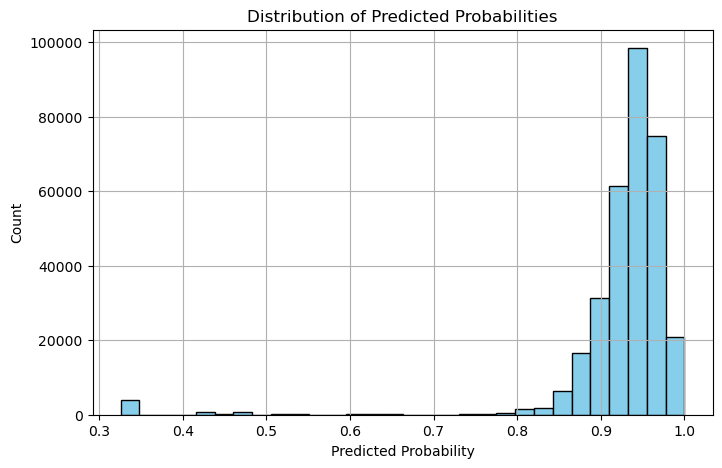

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold2_train['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

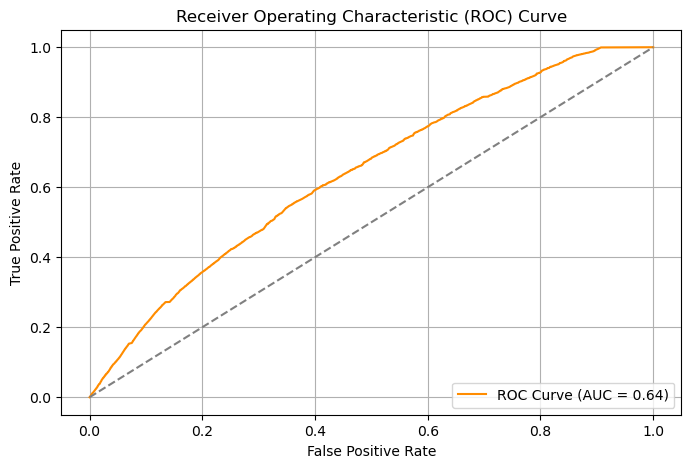

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# True labels and predicted probabilities
y_true = fold2_train['ISATTENDED']
y_scores = fold2_train['predicted_prob']

# Get false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute AUC
auc = roc_auc_score(y_true, y_scores)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [17]:
# Youden's J statistic
j_scores = tpr - fpr
best_index = j_scores.argmax()
best_threshold = thresholds[best_index]

print(f"Best threshold based on Youden's J: {best_threshold:.4f}")

Best threshold based on Youden's J: 0.9401


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Step 1: Create binary predictions
threshold = 0.8
fold2_train['predicted_label'] = (fold2_train['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold2_train['ISATTENDED'], fold2_train['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_31988\2702470919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold2_train['predicted_label'] = (fold2_train['predicted_prob'] >= threshold).astype(int)


array([[  4447,  37070],
       [  3391, 275674]], dtype=int64)

In [19]:
accuracy_score(fold2_train['ISATTENDED'], fold2_train['predicted_label'])

0.8737889213992052

In [20]:
fold2_test.loc[:, 'predicted_prob'] = fold2_test.apply(predict_probability2, axis=1)

C:\Users\giova\AppData\Local\Temp\ipykernel_31988\2748858865.py:92: RuntimeWarning: overflow encountered in exp
  prob = 1 / (1 + np.exp(-score))
C:\Users\giova\AppData\Local\Temp\ipykernel_31988\1388075932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold2_test.loc[:, 'predicted_prob'] = fold2_test.apply(predict_probability2, axis=1)


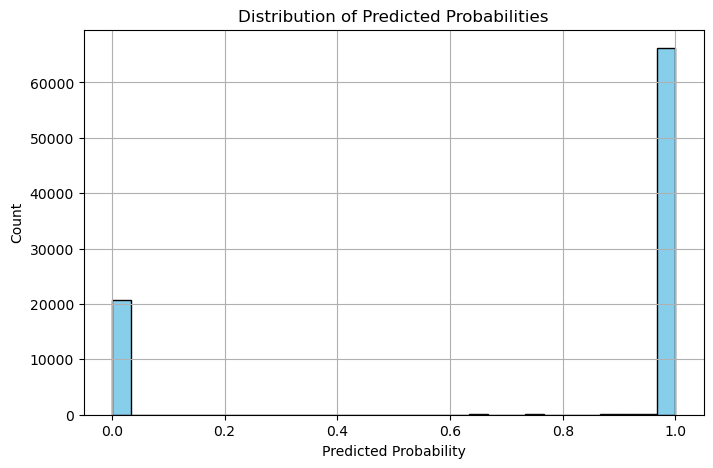

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fold2_test['predicted_prob'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [22]:
fold2_test['predicted_label'] = (fold2_test['predicted_prob'] >= threshold).astype(int)

# Step 2: Get confusion matrix
cm = confusion_matrix(fold2_test['ISATTENDED'], fold2_test['predicted_label'])
cm

C:\Users\giova\AppData\Local\Temp\ipykernel_31988\3385098330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fold2_test['predicted_label'] = (fold2_test['predicted_prob'] >= threshold).astype(int)


array([[ 2992,  7448],
       [18090, 59223]], dtype=int64)

In [23]:
accuracy_score(fold2_test['ISATTENDED'], fold2_test['predicted_label'])

0.7089786104178775